# **Exploratory Data Analysis - Stack Overflow Annual Developer Survey 2021**

The StackOverflow Annual Developer Survey examines all aspects of the developer experience from career satisfaction and job search to education and opinions on open source software. 

The 2021 survey conducted between May 25 2021 and June 15 2021, was answered by 83,439 software developers from 181 countries around the world.They answered questions anout how they learn and level up, which tools they’re using, and what they want.

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## **Making the DataFrame**

In [152]:
survey_results_raw = pd.read_csv('./survey_results_public.csv')
survey_results_raw.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [8]:
survey_results_raw.shape

(83439, 48)

The dataframe contains 83439 rows (number of respondents) and 48 columns (number of questions in the surevey). Free response submissions and personally-identifying information have been removed from the results to protect the privacy of respondents.

### **Viewing all columns**

In [153]:
columns_list = survey_results_raw.columns
columns_list

Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'US_State',
       'UK_Country', 'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'Currency', 'CompTotal',
       'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')

### We see that abbreviations for questions have been used as column names. To get the corresponding question text we can refer to the `survey_results_schema.csv`  available along with the survey results at <https://insights.stackoverflow.com/survey>. 

### The schema contains the questions that correspond to each column name in the `survey_results_raw`



In [14]:
ques_df = pd.read_csv('./survey_results_schema.csv', index_col = 'qname')  # Using qname as index
ques_series = ques_df.question
ques_series.head()

qname
S0            <div><span style="font-size:19px;"><strong>Hel...
MetaInfo                                      Browser Meta Info
S1            <span style="font-size:22px; font-family: aria...
MainBranch    Which of the following options best describes ...
Employment    Which of the following best describes your cur...
Name: question, dtype: object

In [20]:
for i in columns_list:
    if i not in ques_series.index:
        print(i)

ResponseId
LanguageHaveWorkedWith
LanguageWantToWorkWith
DatabaseHaveWorkedWith
DatabaseWantToWorkWith
PlatformHaveWorkedWith
PlatformWantToWorkWith
WebframeHaveWorkedWith
WebframeWantToWorkWith
MiscTechHaveWorkedWith
MiscTechWantToWorkWith
ToolsTechHaveWorkedWith
ToolsTechWantToWorkWith
NEWCollabToolsHaveWorkedWith
NEWCollabToolsWantToWorkWith
ConvertedCompYearly


### We see that corresponding to some entries in `qname` multiple columns have been made in the final survey results database. 

### For eg: Corresponing to the `NEWCollabTools` qname two columns - `NEWCollabToolsHaveWorkedWith` and `NEWCollabToolsWantToWorkWith`. This is so because in the survey both of these questions had been grouped into one (*"Which development environments did you use regularly over the past year, and which do you want to work with over the next year? Please check all that apply."*) hence had the same qname, while the answers in the results have been partitioned to seperate columns.

### In the `ConvertedCompYearly` column of surevey result df- The salaries have been converted from the respondant's currencies to USD using the exchange rate on 2021-06-16, and also converted to annual salaries assuming 12 working months and 50 working weeks.



## **Data Preparation and Cleaning**
-------------------------


### While the survey responses contain a wealth of information, we'll limit our analysis to the following areas:

### - *Demographics of the survey respondents and the global programming community*
### - *Distribution of programming skills, experience, and preferences*
### - *Employment-related information, preferences, and opinions*

### Let's select a subset of columns with the relevant data for our analysis.

In [154]:
selected_columns = [ 
        # Demographic
            'Country', 
            'EdLevel',
            'Age', 
            'Gender', 
            'Trans', 
            'Sexuality',
            'Ethnicity',
        # Programming skills, experience and preferences 
            'Age1stCode', 
            'YearsCode',
            'YearsCodePro',
            'LanguageHaveWorkedWith', 
            'LanguageWantToWorkWith',
            'NEWCollabToolsHaveWorkedWith',
            'NEWCollabToolsWantToWorkWith',
            'OpSys',
        # Employment related
             'DevType', 
             'OrgSize',
             'CompFreq',
             'ConvertedCompYearly'
            ]

In [29]:
len(selected_columns)

19

### For the purpose of our analysis we have chosen a subset of 19 columns

### **Making a sub-dataframe with selected columns**

### We make a copy so that the changes made in the filtered dataframe does not affect the original dataframe

In [288]:
survey_results_filtered = survey_results_raw[selected_columns].copy() # changes made in survey_results_filtered do not affect survey_results_raw
survey_results_filtered.head()

,Country,EdLevel,Age,Gender,Trans,Sexuality,Ethnicity,Age1stCode,YearsCode,YearsCodePro,LanguageHaveWorkedWith,LanguageWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSys,DevType,OrgSize,CompFreq,ConvertedCompYearly
0,Slovakia,"Secondary school (e.g. American high school, G...",25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,18 - 24 years,NaN,NaN,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Swift,PHPStorm;Xcode,Atom;Xcode,MacOS,"Developer, mobile",20 to 99 employees,Monthly,62268.0
1,Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,11 - 17 years,7,NaN,JavaScript;Python,NaN,Android Studio;IntelliJ;Notepad++;PyCharm,NaN,Windows,NaN,NaN,NaN,NaN
2,Russian Federation,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18-24 years old,Man,No,Prefer not to say,Prefer not to say,11 - 17 years,NaN,NaN,Assembly;C;Python;R;Rust,Julia;Python;Rust,IPython/Jupyter;PyCharm;RStudio;Sublime Text;V...,IPython/Jupyter;RStudio;Sublime Text;Visual St...,MacOS,NaN,NaN,NaN,NaN
3,Austria,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,11 - 17 years,NaN,NaN,JavaScript;TypeScript,JavaScript;TypeScript,NaN,NaN,Windows,"Developer, front-end",100 to 499 employees,Monthly,NaN
4,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",25-34 years old,Man,No,NaN,White or of European descent,5 - 10 years,17,10,Bash/Shell;HTML/CSS;Python;SQL,Bash/Shell;HTML/CSS;Python;SQL,Atom;IPython/Jupyter;Notepad++;PyCharm;Vim,Atom;IPython/Jupyter;Notepad++;PyCharm;Vim;Vis...,Linux-based,"Developer, desktop or enterprise applications;...","Just me - I am a freelancer, sole proprietor, ...",NaN,NaN


### **Studying the filtered dataframe**

In [37]:
survey_results_filtered.shape

(83439, 19)

In [38]:
survey_results_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       83439 non-null  object 
 1   EdLevel                       83126 non-null  object 
 2   Age                           82407 non-null  object 
 3   Gender                        82286 non-null  object 
 4   Trans                         80678 non-null  object 
 5   Sexuality                     73366 non-null  object 
 6   Ethnicity                     79464 non-null  object 
 7   Age1stCode                    83243 non-null  object 
 8   YearsCode                     81641 non-null  object 
 9   YearsCodePro                  61216 non-null  object 
 10  LanguageHaveWorkedWith        82357 non-null  object 
 11  LanguageWantToWorkWith        76821 non-null  object 
 12  NEWCollabToolsHaveWorkedWith  81234 non-null  object 
 13  N

### We can see that the data types of most of the columns is `object`, which can either be because the column contains data of varying data types or null values (`NaN`). We can also see that most of the columns contain empty cells as the number of `non-null` values is less than 83439.

### We will convert the data type of the columns from `object` to their respective data types, setting invalid parsings as `NaN`.

In [156]:
survey_results_filtered['YearsCode']= pd.to_numeric(survey_results_filtered['YearsCode'], errors = 'coerce') #coerce converts non-numeric to NaN
survey_results_filtered['YearsCodePro']= pd.to_numeric(survey_results_filtered['YearsCodePro'], errors = 'coerce')

### **Studying numerical columns**

In [41]:
survey_results_filtered.describe()

,YearsCode,YearsCodePro,ConvertedCompYearly
count,79982.000000,58467.000000,4.684400e+04
mean,12.485722,9.572511,1.184262e+05
std,9.626184,8.123225,5.272944e+05
min,1.000000,1.000000,1.000000e+00
25%,5.000000,4.000000,2.702500e+04
50%,10.000000,7.000000,5.621100e+04
75%,17.000000,13.000000,1.000000e+05
max,50.000000,50.000000,4.524131e+07



## **Exploratory Analysis and Visualisation**
---------------------

In [8]:
# Presets for visualisation
sns.set_style('darkgrid')

matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### **DEMOGRAPHIC ANALYSIS**

### Firstly we will analyse the **Demographic** to get an overview of the respondents background. This initial analysis will show us how descriptive the survey is of the worldwide community. This might reveal the existence of biases if any.


### **Gender Distribution**


---------


### The gender column contains multiple entry in a single column. For simplifying analysis, We will just use `Man` and `Woman`, dropping other colummns

In [158]:
gender_df = survey_results_filtered.copy()
gender_df.drop(survey_results_filtered[(survey_results_filtered['Gender'] != 'Man') & (survey_results_filtered['Gender'] != 'Woman')].index, inplace = True)

gender_distribution = gender_df.Gender.value_counts()
gender_distribution

Man      74817
Woman     4120
Name: Gender, dtype: int64

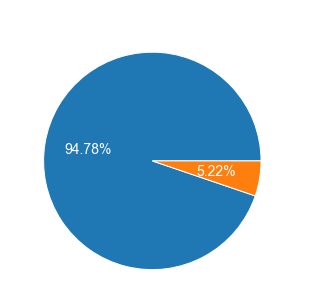

In [126]:
plt.rcParams.update({'text.color': "white"})
plt.pie( gender_distribution, labels = gender_distribution.index, autopct='%1.2f%%')
plt.title('Gender distribution');

### Through the chart we can clearly see proportion of women answering the survey is extremely small - **5.22%** in comparison men (Other gender combinations have been currently been ignored to simplify analysis). We can hence say that this survey might not be as descriptive and complete in examining all aspects of a womans's experiences as a developer.

### If we consider this survey to be a correct representation of the actual developer community then we can clearly spot the existence of a huge **gender gap** in the community.


### **Country-wise Distribution**
------------------------

### Here, we analysze the overall geographical distribution of the Computer Science Community

In [ ]:
countrywise_dist = survey_results_filtered.Country.value_counts()
countrywise_dist

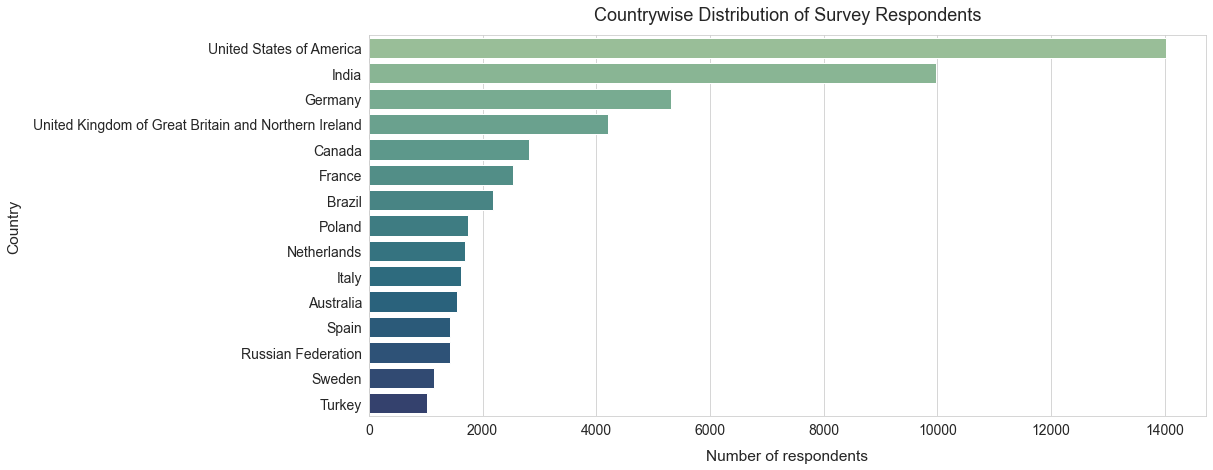

In [84]:
plt.figure(figsize = (15, 7))
plt.rcParams.update({'text.color': "black"})
sns.set_style('whitegrid')
sns.barplot(y = countrywise_dist.head(15).index, x = countrywise_dist.head(15), palette = "crest")
plt.ylabel('Country', size = 15.5, labelpad = 12)
plt.xlabel('Number of respondents', size = 15.5,labelpad = 12)
plt.title('Countrywise Distribution of Survey Respondents', size = 18, pad = 15);

### The chart represents the 10 countries with highest number of respondents.There is an inconsistent increasing trend with a **disproportionately high** reprepresentation from **United States** and **India**.This can be because these two countries have the highest english speaking population. 

### There was no participation from China in this survey.Otherwise, We would have it's participation to have lied above the 4th place (atleast).

### **Percentage of respondants from english speaking countries**

### We test our hypthesis that language could have been the reason for lesser partcipation from Non-English speaking countries.For this purpose we use `country_lang.xlsx` made using [this link](https://github.com/JovianML/opendatasets/blob/master/data/countries-languages-spoken/countries-languages.csv). The excel contains two columns `Country` and `Languages Spoken`.

### We make a combined dataframe which would contain the Country names, Number of respondents and Languages spoken in that country. For each row in the combined dataframe where English is one of the spoken languages, we add the number of respondents corresponding to that country to get the total number of respondents from english speaking countries.

In [ ]:
country_lang_df = pd.read_excel('country_lang.xlsx')

countrywise_dist = countrywise_dist.to_frame() # series to df

countrywise_dist.reset_index(inplace = True) # converting countries from index to a column
countrywise_dist.rename(columns = {'Country': 'Number of Respondents', 'index': 'Country'}, inplace = True)

countrywise_dist.sort_values('Country') # Sorting countries alphabetically to make columns from both df in the same order

conc_df = pd.merge(countrywise_dist, country_lang_df, how = 'inner') # merging the dataframes

english_speaking_pop = 0
for index, row in conc_df.iterrows():
    if ('English' in row['Languages Spoken']):
        english_speaking_pop += row['Number of Respondents']
    
perc_eng_pop = (english_speaking_pop/ conc_df['Number of Respondents'].sum())* 100)
  

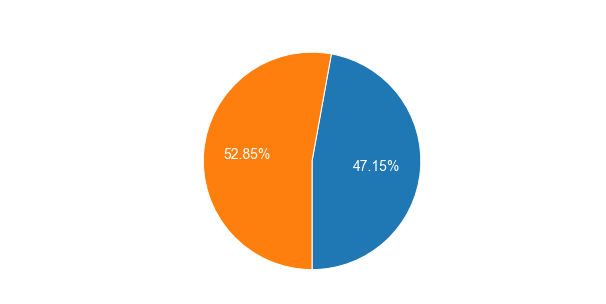

In [149]:
matplotlib.rcParams['figure.facecolor'] = '#00000000'
plt.rcParams.update({'text.color': "white"})
plt.pie([perc_eng_pop, 100 - perc_eng_pop], labels = ['English speaking countries', 'Non-English speaking country'], autopct='%1.2f%%', startangle = 270)
plt.title('Percentage of respondents from English and Non-English speaking countries');

### Even through more than 50% respondents belong to non-english speaking countries this percent is quiet low considering most of the world does not speak english (According to [this report](https://www.washingtonpost.com/news/worldviews/wp/2015/04/23/the-worlds-languages-in-7-maps-and-charts), Only 4.83% of the world speaks english ). 


### In an ideal distribution, we would have expected a much higher participation from the non english speaking countries in comparison to the english speaking countries (proportional to the non english speaking population). 

### We can see that Computer Science remains to be a field with relatively higher participation from English speaking population. This can be because of most languages have an english based syntax.Ever since their inception most programming languages have been based off on English. Hence, Non - English speakers have a much harder time understanding or making any sense of anything they write. **_Programming is intrinsically bound to the English language._**

### **Gender-wise geographical distribution of the Computer Science Community**

### Here, we compare and the total number of Women respondents from a specific country  to the total number of women Respondents. We do a similar analysis for men. We get a genderwise geographical distribution of Computer Science community.


### _Share of top 10 countries in the total number of Female respondents_

In [626]:
gender_df[gender_df['Gender'] == 'Woman'].Country.value_counts().head(10).sum()/ gender_df[gender_df['Gender'] == 'Woman'].Country.value_counts().sum() * 100

60.02427184466019

### _Share of top 10 countries in the total number of Male respondents_

In [627]:
gender_df[gender_df['Gender'] == 'Man'].Country.value_counts().head(10).sum()/ gender_df[gender_df['Gender'] == 'Man'].Country.value_counts().sum() * 100


58.50541989120119

### We can see that the top 10 countries with highest number of respondents make for almost **60%** of the total responses (in case of both women and men) . We can hence conclude that, using the data from these countries as our superset to solve our purpose in hand would give us an aproximate picture of the entire data.

In [359]:
gender_df.Country = gender_df['Country'].astype(str)

In [405]:
women_dist = gender_df[gender_df['Gender'] == 'Woman'].Country.value_counts().head(10)
men_dist = gender_df[gender_df['Gender'] == 'Man'].Country.value_counts().head(10)

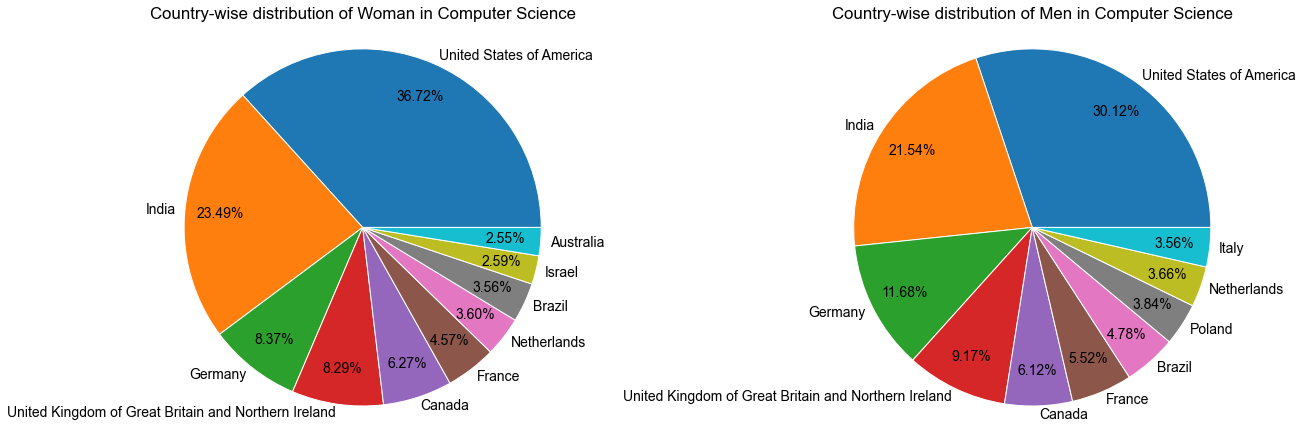

In [460]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

axes[0].pie(women_dist.values, labels = women_dist.index, autopct='%1.2f%%',pctdistance= 0.8, labeldistance=1.05, radius = 2);
axes[0].set_title('Country-wise distribution of Woman in Computer Science\n\n\n\n\n', pad = 10);


axes[1].pie(men_dist.values, labels = men_dist.index, autopct='%1.2f%%',pctdistance= 0.8, labeldistance=1.05, radius = 2);
axes[1].set_title('Country-wise distribution of Men in Computer Science\n\n\n\n\n', pad = 10);

fig.subplots_adjust(wspace = 2);




### We can see an almost similar distribution of men and women involved in Computer Science, geographically. **US** and **India ** harbour the maximum Computer Science talent regardless of gender. We can see a relatively higher participation from women in **Israel** compared to men in Israel in the overall men's computer Science community.

### We can conclude, even though the participation of women in the programming community is very low in comparison to men. The countries with highest number of men involved in the community also have a relatively high number of women (In comparison to total number of women in CS) involved.

### **Age Distribution**
-----------------


In [159]:
age_df = survey_results_filtered.copy()

# converting the 'Under 18 years old' to '0-18 years old' (to simpilfy indexing)
age_df['Age'].replace(to_replace = 'Under 18 years old', value = '0-18 years old', inplace = True)

# removing rows with 'prefer not to say'
age_df.drop(survey_results_filtered[survey_results_filtered['Age'] == 'Prefer not to say'].index, inplace = True)

age_distribution = age_df.groupby('Age')['Country'].count()

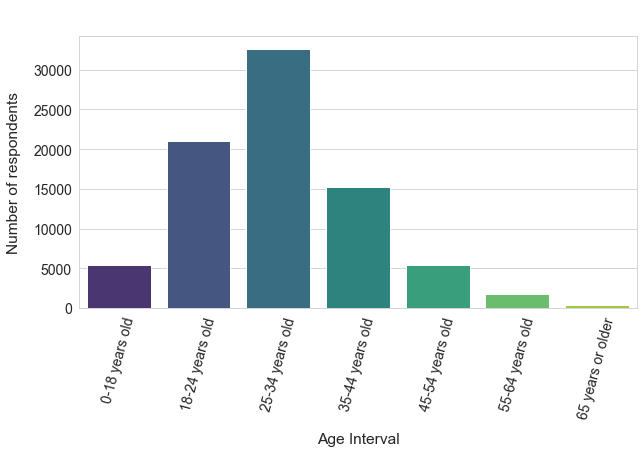

In [162]:
plt.figure(figsize = (10, 5))
sns.barplot(y = age_distribution, x = age_distribution.index, palette = "viridis")
plt.xlabel('Age Interval', size = 15.5, labelpad = 12)
plt.ylabel('Number of respondents', size = 15.5, labelpad = 12)
plt.xticks(rotation = 75)
plt.title('Age Distribution of Survey Respondents', size = 20, pad = 15);

### We can see that the age interval of **25-34** has the highest number of respondents. Additionally, with increasing age the number of respondents is consistently decreasing. The increasing trend in the number of respondents uptill the age of 34 is indicative of the growing interest in development.

### This is finding is supported by the fact that the computer science community has grown and developed a little over 20 years ago.

### **Education Level**
--------

In [164]:
ed_level_dist = survey_results_filtered.EdLevel.value_counts()
ed_level_dist

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          35357
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       17512
Some college/university study without earning a degree                                10589
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     9534
Other doctoral degree (Ph.D., Ed.D., etc.)                                             2567
Primary/elementary school                                                              2479
Associate degree (A.A., A.S., etc.)                                                    2231
Something else                                                                         1601
Professional degree (JD, MD, etc.)                                                     1256
Name: EdLevel, dtype: int64

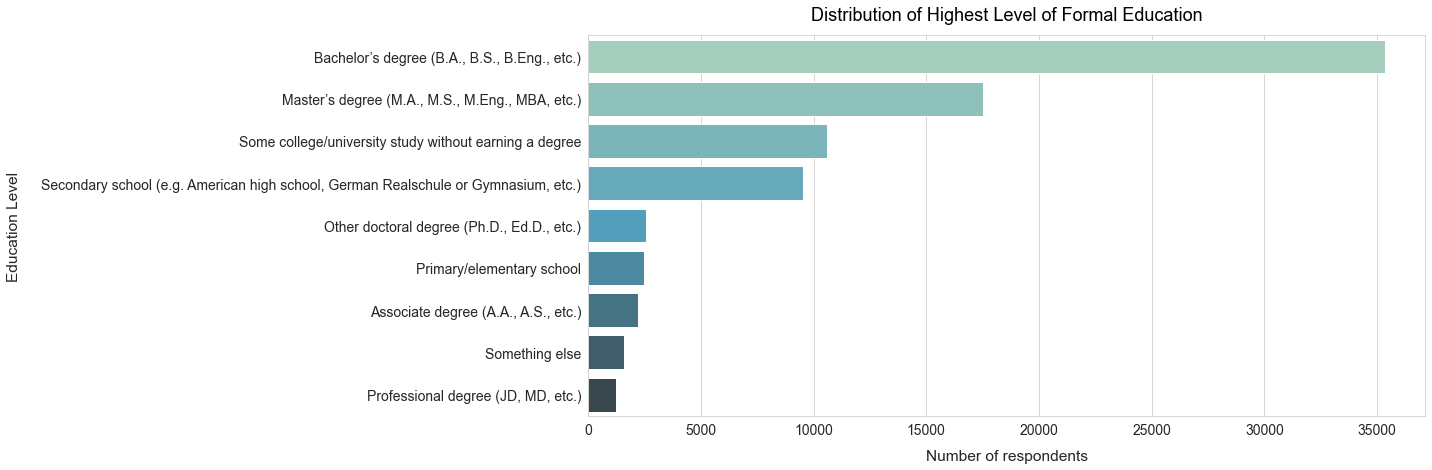

In [195]:
plt.figure(figsize = (15, 7))
plt.rcParams.update({'text.color': "black"})
sns.barplot(y = ed_level_dist.index, x = ed_level_dist, palette = "GnBu_d")
plt.ylabel('Education Level', size = 15.5, labelpad = 20)
plt.xlabel('Number of respondents', size = 15.5,labelpad = 12)
plt.title('Distribution of Highest Level of Formal Education', size = 18, pad = 15);

### We can see highest participation by people with a Bachelor's degree (Not clear if degree in Computer Science). We see a considerably high participation by people who have studied in some college/university without earning degree. This can be indicative of the consideration that computer science is a domain where skills have more value than degrees. 

### Moderately high participation with people with secondary school degrees shows how people have started getting involved in the computer science community even before college. Responses from Primary/Elementary school degree holders is almost equivalent to that from doctoral degree holders.

### **Checking genderwise Highest Level of Formal Education**

### **_Graphical_**

In [196]:
genderwise_ed_level_dist = gender_df.EdLevel.value_counts()

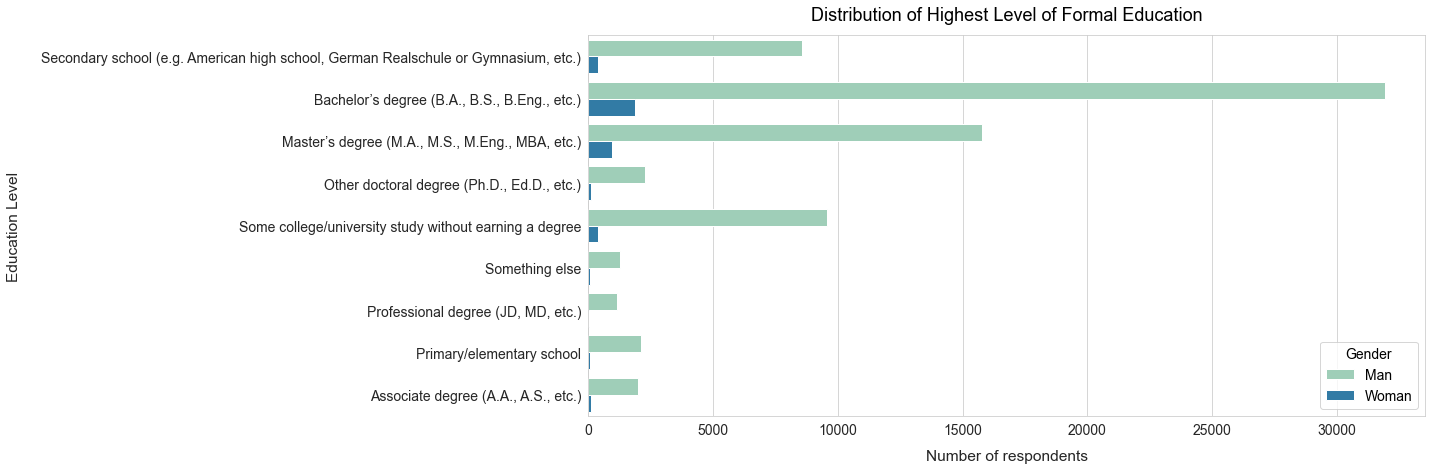

In [249]:
plt.figure(figsize = (15, 7))
plt.rcParams.update({'text.color': "black"})
g = sns.countplot(y  = 'EdLevel', data = gender_df, palette = 'YlGnBu', hue = 'Gender')
plt.ylabel('Education Level', size = 15.5, labelpad = 20)
plt.xlabel('Number of respondents', size = 15.5,labelpad = 12)
plt.title('Distribution of Highest Level of Formal Education', size = 18, pad = 15);


### **_Mathematical_**

### We use ratio as the metric to compare responses

In [262]:
men_to_women_ratio = gender_df[gender_df['Gender'] == 'Man']['Country'].count()/gender_df[gender_df['Gender'] == 'Woman']['Country'].count()
print(f"The overall men to women response ration is:  {men_to_women_ratio} \n")

man_count = gender_df[gender_df['Gender'] == 'Man']['EdLevel'].value_counts()
woman_count = gender_df[gender_df['Gender'] == 'Woman']['EdLevel'].value_counts()
print("The men to women ratio in each level of formal education is:\n ")
print(man_count/woman_count)


The overall men to women response ration is:  18.159466019417476 

The men to women ratio in each level of formal education is:
 
Associate degree (A.A., A.S., etc.)                                                   16.806723
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          17.048585
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       16.424558
Other doctoral degree (Ph.D., Ed.D., etc.)                                            17.067669
Primary/elementary school                                                             24.488372
Professional degree (JD, MD, etc.)                                                    23.833333
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    21.900256
Some college/university study without earning a degree                                23.749380
Something else                                                                        13.698925
Name: 

### We compare each ratio of formal education to the ratio of men and women who participated in the survey. If the value of former is greater than latter it would be because of lesser number women with that response. 

### We can see that the count of  women's responses to each level of formal education is almost proportional to that of men. We can see comparitevely lesser participation from women whose highest level of education are **Primary/elementary school**, **Professional degree** and **Some college/university study without earning a degree**.This could be because of traditional beliefs that computer science and other technical fields are less suitable and growth friendly for women. 

### Woman at younger ages, might not be getting the same kind of exposure and encouragement to pursue technical fields in comparison to boys. Lesser participation from women holding Professional degrees could be attributed to a similar cause.

### **Employment Background**
----------

In [322]:
survey_results_filtered.DevType.value_counts()

Developer, full-stack                                                                                                                                                                                              8601
Developer, back-end                                                                                                                                                                                                5467
Developer, front-end                                                                                                                                                                                               2402
Developer, front-end;Developer, full-stack;Developer, back-end                                                                                                                                                     2141
Developer, full-stack;Developer, back-end                                                                                               

### We can see that the survey had allowed respondents to select multiple options to describe their current job. We make a new dataframe, dropping all rows with`NaN` values. We get all unique responses (all selected combinations) for the `DevType` column.


In [329]:
roles_df = survey_results_filtered.copy() # Making a seperate df
roles_df.dropna(subset=['DevType'], how='all', inplace=True)

roles_df['DevType'] = roles_df.DevType.astype('string')
roles_df.drop(roles_df[roles_df['DevType'] == 'Other (please specify):'].index, inplace = True)

unique_role_combinations = roles_df.DevType.unique() # Getting all unique responses for Job description

### Now that we have gotten all the unique set of options selected, we make a dictionary of all seperate job roles with job title as key and value initialized to zero. Multiple options are seperated by `;`.

In [335]:
roles_dict = {}

for combination in unique_role_combinations:
    if ((';' not in combination) and (combination not in roles_dict)):
        roles_dict[combination] = 0
    else:
        roles_in_combination = combination.split(';')
        for role in roles_in_combination:
            if (role not in roles_dict):
                roles_dict[role] = 0

print(roles_dict)


{'Developer, mobile': 0, 'Developer, front-end': 0, 'Developer, desktop or enterprise applications': 0, 'Developer, full-stack': 0, 'Engineer, data': 0, 'Other (please specify):': 0, 'Data scientist or machine learning specialist': 0, 'Developer, back-end': 0, 'Academic researcher': 0, 'Database administrator': 0, 'Scientist': 0, 'Student': 0, 'Developer, QA or test': 0, 'Developer, game or graphics': 0, 'Developer, embedded applications or devices': 0, 'DevOps specialist': 0, 'Data or business analyst': 0, 'Designer': 0, 'Engineering manager': 0, 'Engineer, site reliability': 0, 'System administrator': 0, 'Product manager': 0, 'Senior Executive (C-Suite, VP, etc.)': 0, 'Educator': 0, 'Marketing or sales professional': 0}


### We now iterrate over each cell in the `DevType` column in `roles_df`, Get seperate roles if `;` exists in the cell. We then increment value for that each role appearing in that row. (Increment value of that key in the `roles_dict`)

In [338]:

for role in roles_df.DevType:
    if (';' not in role):
        roles_dict[role] = roles_dict[role] + 1
    else:
        roles_in_combination = role.split(';')
        for iseperate_role in roles_in_combination:
            roles_dict[iseperate_role] = roles_dict[iseperate_role] + 1

print(roles_dict)

{'Developer, mobile': 9802, 'Developer, front-end': 18233, 'Developer, desktop or enterprise applications': 11036, 'Developer, full-stack': 32891, 'Engineer, data': 4176, 'Other (please specify):': 1841, 'Data scientist or machine learning specialist': 4273, 'Developer, back-end': 29071, 'Academic researcher': 2899, 'Database administrator': 5655, 'Scientist': 2015, 'Student': 4187, 'Developer, QA or test': 3611, 'Developer, game or graphics': 2112, 'Developer, embedded applications or devices': 4598, 'DevOps specialist': 7058, 'Data or business analyst': 3792, 'Designer': 4611, 'Engineering manager': 3810, 'Engineer, site reliability': 2448, 'System administrator': 6079, 'Product manager': 3074, 'Senior Executive (C-Suite, VP, etc.)': 2103, 'Educator': 2369, 'Marketing or sales professional': 638}


In [344]:
pd.DataFrame.from_dict({'Job Description': roles_dict.keys(), 'Count': roles_dict.values()}).sort_values('Count', ascending = False)

,Job Description,Count
3,"Developer, full-stack",32891
7,"Developer, back-end",29071
1,"Developer, front-end",18233
2,"Developer, desktop or enterprise applications",11036
0,"Developer, mobile",9802
15,DevOps specialist,7058
20,System administrator,6079
9,Database administrator,5655
17,Designer,4611
14,"Developer, embedded applications or devices",4598


### It is clear that the highest number of roles are of type **developer**.

In [643]:
sum(roles_dict.values())

172382

### **PROGRAMMING SKILLS**



### **Programming Languages**
--------



### **Languages worked with**

### Respondents were asked to select all the programming languages they have worked with in the past. The rows in the `LanguageHaveWorkedWith` column contains value seperated by `;`. For this purpose we define a function which takes the column series as input and returns a dataframe with each seperate option as a column. The selected options for each response (each row) is marked as `True`.

In [474]:
def columnsplit(col_series):
    df = col_series.to_frame()
    options = []
    # Iterate over the column
    # Keeping only the rows where value is not null (NaN)
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Splitting into individual options
        for option in value.split(';'):
            # Add the option as a column to result
            # Initialize all values of column to False
            if not option in df.columns:
                options.append(option)
                df[option] = False
            # For the given iteration at the given id, make the value inside option column True
            df.at[idx, option] = True
    return df[options]

In [479]:
lang_worked_df = columnsplit(survey_results_filtered.LanguageHaveWorkedWith)

In [ ]:
lang_worked_dist = lang_worked_df.sum().sort_values(ascending = False)
lang_worked_dist

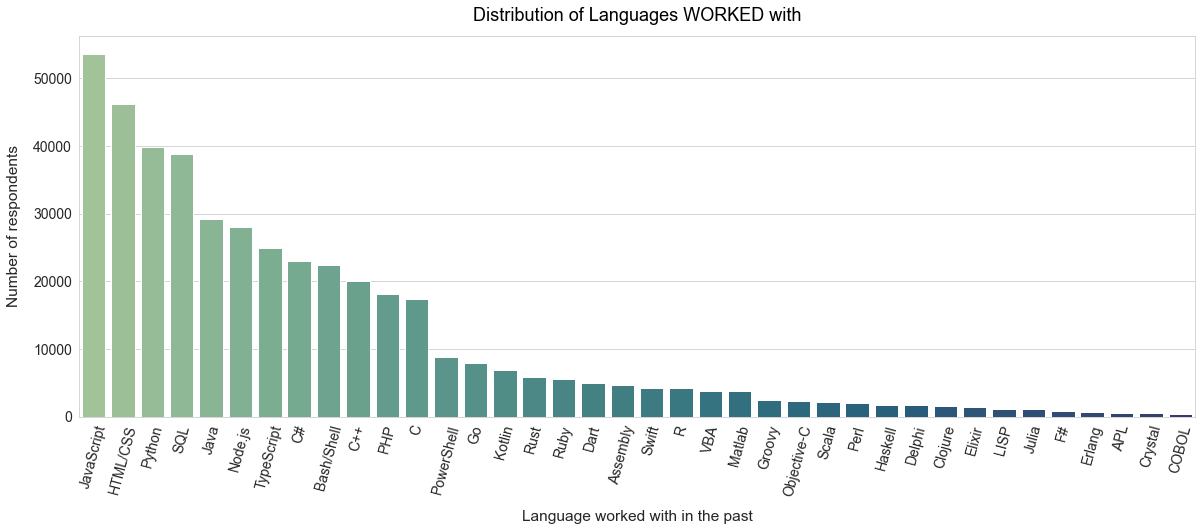

In [549]:
plt.figure(figsize=(20,7))
sns.barplot(x = lang_worked_dist.index, y = lang_worked_dist, palette = "crest")
plt.xlabel('Language worked with in the past', size = 15.5, labelpad = 12)
plt.ylabel('Number of respondents', size = 15.5,labelpad = 12)
plt.xticks(rotation = 75)
plt.title('Distribution of Languages WORKED with', size = 18, pad = 15);

### We can see that Web developement languages - **JavaScript** and **HTML/CSS** top the charts. Their popularity can be attributed to their ease of learning. The same reason could explain the widespread usage of python. Python is also highly accepted in the Machine Learning and Data Science community. 
### SQL is necessary when it comes to working with Relational Databases, which is an extremely essential skill. We can see Java, previously the most commonly used language in the computer science community holding its share at the fifth position, it is associated with the development of client-server applications, which are used by large businesses around the world. 

### **Languages want to work with**

In [495]:
lang_want_df = columnsplit(survey_results_filtered.LanguageWantToWorkWith)
lang_want_dist = lang_want_df.sum().sort_values(ascending = False)

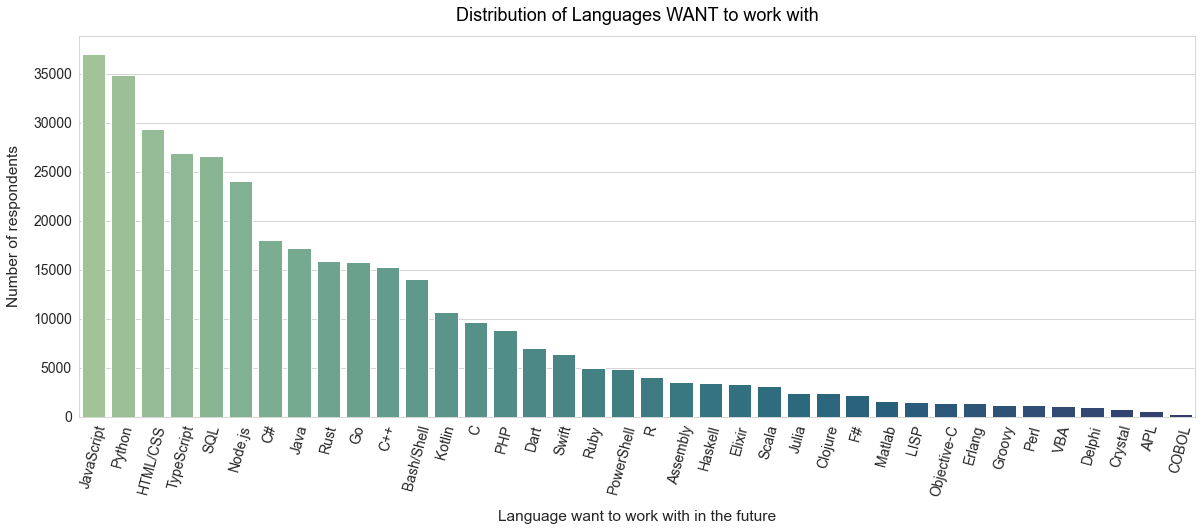

In [548]:
plt.figure(figsize=(20,7))
sns.barplot(x = lang_want_dist.index, y = lang_want_dist, palette = "crest")
plt.xlabel('Language want to work with in the future', size = 15.5, labelpad = 12)
plt.ylabel('Number of respondents', size = 15.5,labelpad = 12)
plt.xticks(rotation = 75)
plt.title('Distribution of Languages WANT to work with', size = 18, pad = 15);

### We can see the top languages that people want to learn are almost similar to the top languages people are working with, which indicates people the people's want to keep up with the skills required in the community. **Typescript**, **Rust** and **Go** hold relatively higher positions in the want to learn chart. This popularity of typescript can be explained by it basically being  staticically typed Javascript, which increases the ease of usage by increasing the probability of catching bugs.

### Rust and Go are the youngest open-source programming languages widely in use today. They provide better memory safety, high-performance output, and really high modularity.Hence, are very reliable languages to build efficient software.

## **Questioning and Answering using Data**

## **_Q. Which are the most loved language? i.e., a high percentage of people who have used the language want to continue learning & using it over the next year?_**

### To find this we need to take an intersection between `lang_want_df` and `lang_worked_df`. Only those rows which are `True` for a given column in both dataframes need to be included (Get the subset of people have worked with the language and want to continue working with it).

In [542]:
lang_intersec_df = lang_want_df & lang_worked_df
lang_intersec_df.head()

,APL,Assembly,Bash/Shell,C,C#,C++,COBOL,Clojure,Crystal,Dart,...,PowerShell,Python,R,Ruby,Rust,SQL,Scala,Swift,TypeScript,VBA
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False


### Now we need to find the percentage of people who **want to continue working** with the language out of the **ones who have worked with the language**.

In [563]:
loved_lang_series = (lang_intersec_df.sum() * 100/lang_worked_df.sum()).sort_values(ascending = False)
loved_lang_series.head()

Rust          86.980514
Clojure       81.121134
TypeScript    72.732747
Elixir        72.114047
Julia         70.692884
dtype: float64

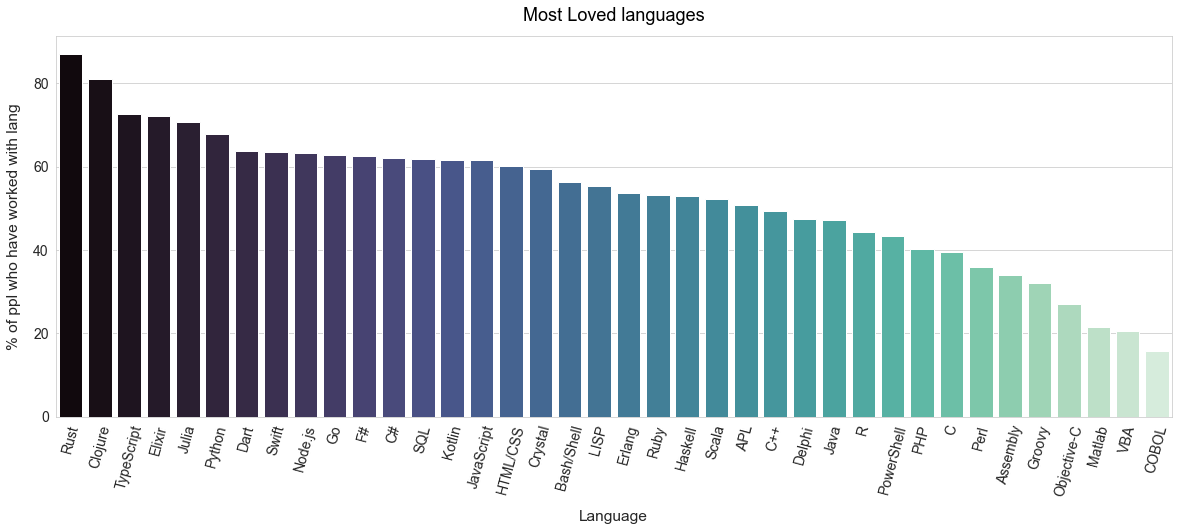

In [567]:
plt.figure(figsize=(20,7))
sns.barplot(x = loved_lang_series.index, y = loved_lang_series, palette = "mako")
plt.xlabel('Language', size = 15.5, labelpad = 12)
plt.ylabel('% of ppl who have worked with lang', size = 15.5,labelpad = 12)
plt.xticks(rotation = 75)
plt.title('Most Loved languages', size = 18, pad = 15);

### All of the highly loved languages are ones developed as replacements of conventionally used languages which are much harder to learn. New languages such as **Rust**, **Clojure** and **TypeScript** provide additional functionalities on top of these previously popular languages (C, C++, Java).

### - ***Rust*** is great for building things like operating systems, file systems, and game engines. And is significantly easier and efficient to learn in comparison to C++ or C, which justifies the love its receiving. 

### - Given the given rise of interest in Data, ***Clojure***'s usage has seen a significant rise. Clojure is extensively used for processing large volumes of data as in case of data mining and commercial-AI. 

### - ***TypeScript*** simplifies JavaScript code, making it easier to read and debug. Ease of understanding code in comparison with JavaScript, increases its lovability.

### - ***Elixir*** is starting to be considered as an excellent choice for any situation where performance and scalability are at a premium. It's proven itself useful for distributed systems like Blockchain projects, embedded systems, as well as real-time apps using instant messaging, video chats, or financial apps.

## ***Q. What is the Average compensation of each Job role?***

### For the purpose of this analysis, we will firstly make a new dataframe using the `split_multicolumn` function on the `DevType` column in `survey_results_filtered`

In [628]:
jobs_df = split_multicolumn(survey_results_filtered.DevType)

### We now concatenate the `jobs_df` with the `ConvertedCompYearly` of `survey_filtered_raw`. In the concatenated dataframe, we now drop the `NaN` values from the `ConvertedCompYearly` column.

In [630]:
concat_df = pd.concat([jobs_df,comp_df.ConvertedCompYearly.to_frame()], axis = 1)
concat_df.dropna(subset = ['ConvertedCompYearly'], inplace = True)
concat_df.head()


,"Developer, mobile","Developer, front-end","Developer, desktop or enterprise applications","Developer, full-stack","Engineer, data",Other (please specify):,Data scientist or machine learning specialist,"Developer, back-end",Academic researcher,Database administrator,...,Data or business analyst,Designer,Engineering manager,"Engineer, site reliability",System administrator,Product manager,"Senior Executive (C-Suite, VP, etc.)",Educator,Marketing or sales professional,ConvertedCompYearly
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,62268.0
9,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,51552.0
11,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,46482.0
12,False,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,77290.0
16,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,17748.0


### We now make a dictionary of average compensation of each job role (job title as key and the average compensation as value). Then converting the dict to a series.

In [639]:
role_comp_dict = {}

# Making a dict of avg comp
for col in concat_df.columns:
    if (col != 'ConvertedCompYearly'):
        role_comp_dict[col] = concat_df[concat_df[col] == True].ConvertedCompYearly.mean()

# Converting to a series
role_comp = pd.Series(role_comp_dict)
# Converting data type from float to int
role_comp.astype('int')


Developer, mobile                                 91002
Developer, front-end                             104569
Developer, desktop or enterprise applications    120476
Developer, full-stack                            117214
Engineer, data                                   119498
Other (please specify):                          148591
Data scientist or machine learning specialist    129225
Developer, back-end                              113482
Academic researcher                               87520
Database administrator                           114322
Scientist                                        118783
Student                                           53721
Developer, QA or test                            110535
Developer, game or graphics                       98984
Developer, embedded applications or devices      133946
DevOps specialist                                133387
Data or business analyst                         120215
Designer                                        

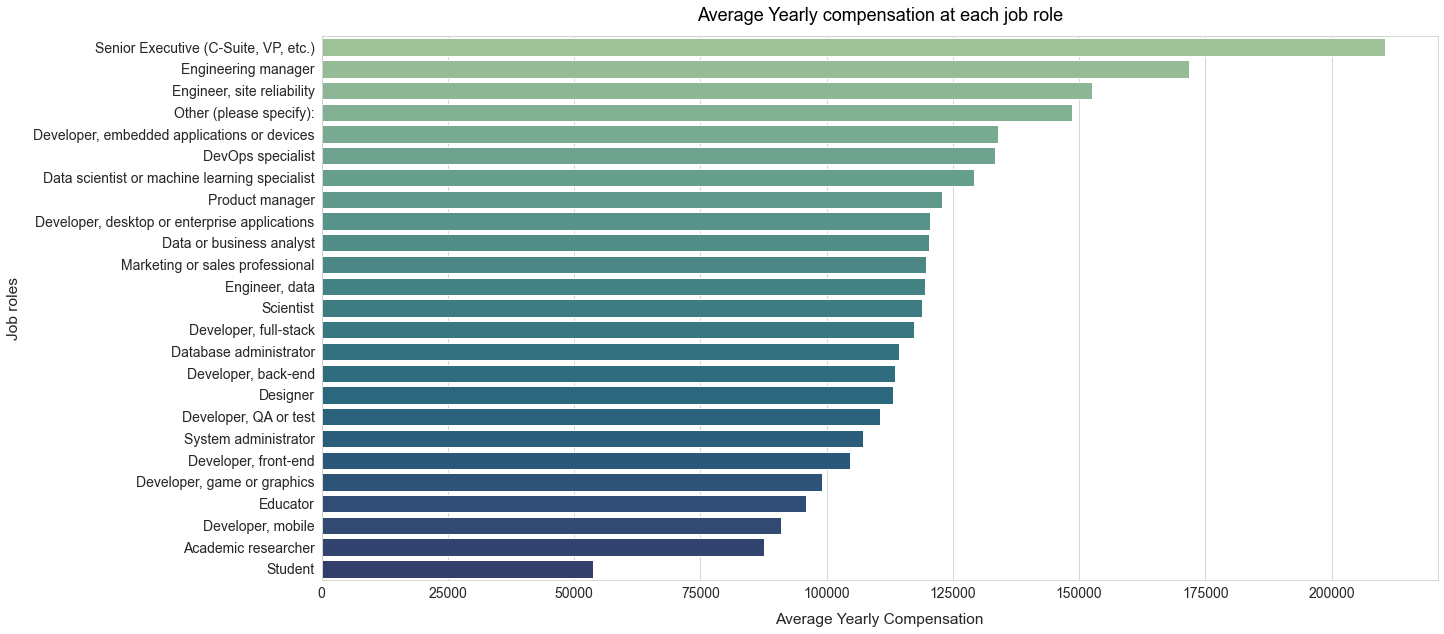

In [641]:
plt.figure(figsize=(20,10))
sns.barplot(y = role_comp.sort_values(ascending = False).index, x = role_comp.sort_values(ascending = False), palette = 'crest');
plt.xlabel('Average Yearly Compensation', size = 15.5, labelpad = 12)
plt.ylabel('Job roles', size = 15.5,labelpad = 12)
plt.title('Average Yearly compensation of each job role', size = 18, pad = 15);


### As exepected, we can see an increase in compensation with a rise seniority, with the **Senior Executives** on top, followed by **Managers**, **Specialists** and **Developers**. We can see a sharp difference of almost _18%_ between the average compensation of Senior Executives and ones following them. The difference between the other consecutive roles (arranged in order of average comp) is not that stark.

### We observe relatively higher compensation of professionals working with data i.e Data Scientists and Data analysts in comparison to Developers. We might attribute this observation to the number of people  involved in the field. During exploratory analysis, we found that number of data science professionals (~5% of total respondants) were much lesser than the number of developers(~64% of total respondants). We might conclude that that the lack of easily obtainable talent in the field, drives up the compensation of ones involved.

## ***How does the country wise compensation vary? Is their a parity of compensation between genders?***

### For the purpose of this analysis, we will use the data from the 10 countries with the highest number of respondents. For the current problem we'll only use the `Country`, `Gender` and `ConvertedCompYearly` column from the `gender_df` dataframe (Containing data for only men and women). Once the dataframe has been prepared, we'll calculate the overall average yearly compensation, average compensation of men and average compensation women of each country.

In [842]:
# 10 Countries with the highest number of respondents
country_list = countrywise_dist.sort_values(by = ['Number of Respondents'], ascending = False).head(10).Country

In [848]:
# Preparing the data frame for the analysis
country_gend_df = gender_df[['Country', 'Gender', 'ConvertedCompYearly']].copy()
country_gend_df.dropna(subset = ['ConvertedCompYearly'], inplace = True)

# Getting data for countries in country_list
country_gend_df = country_gend_df[country_gend_df['Country'].isin(country_list)]
country_gend_df.head()

,Country,Gender,ConvertedCompYearly
12,Germany,Man,77290.0
17,Canada,Man,46135.0
23,France,Man,38915.0
24,Germany,Man,77831.0
27,United Kingdom of Great Britain and Northern I...,Man,68507.0


In [849]:
# Seperate df for men and women
man_df = country_gend_df[country_gend_df.Gender == 'Man']
woman_df = country_gend_df[country_gend_df.Gender == 'Woman']

In [850]:
# Overall avg compensation
country_gend_df = country_gend_df.groupby('Country').mean()
country_gend_df.rename(columns = {'ConvertedCompYearly': 'Average Yearly Compensation'}, inplace = True)

In [851]:
# Average compensation of men and women 
country_gend_df = pd.concat([country_gend_df, man_df.groupby('Country').mean()], axis = 1)
country_gend_df.rename(columns = {'ConvertedCompYearly': 'Men Average Compensation'}, inplace = True)

country_gend_df = pd.concat([country_gend_df, woman_df.groupby('Country').mean()], axis = 1)
country_gend_df.rename(columns = {'ConvertedCompYearly': 'Women Average Compensation'}, inplace = True)

In [910]:
# Abbreviating 'United Kingdom of Great Britain and Northern Ireland'
as_list = country_gend_df.index.tolist()
idx = as_list.index('United Kingdom of Great Britain and Northern Ireland')
as_list[idx] = 'UK & N. Ireland'
country_gend_df.index = as_list

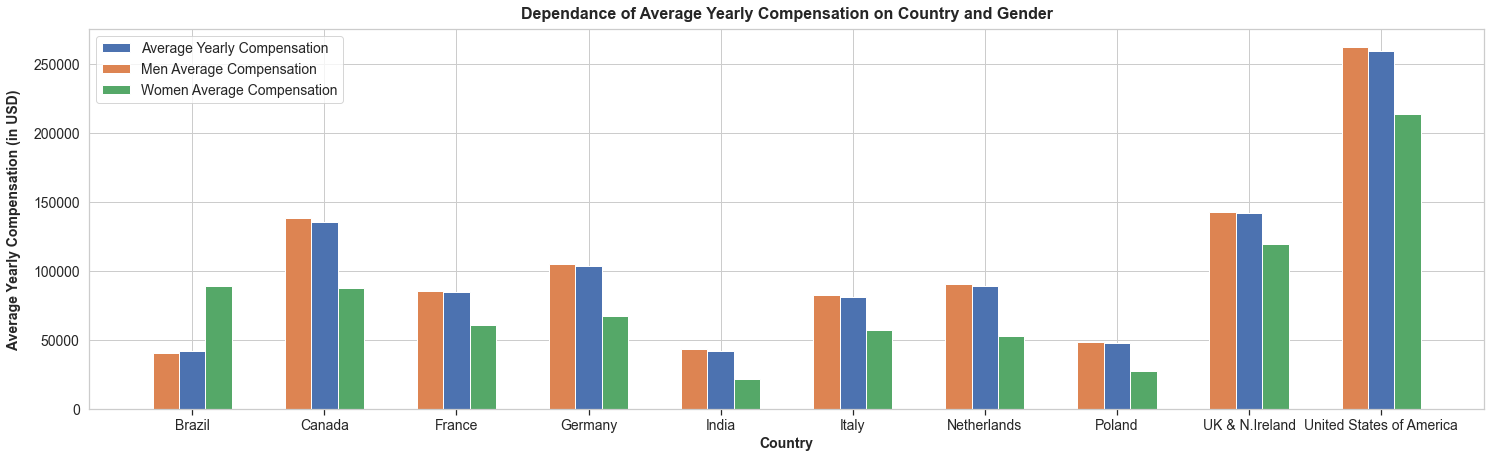

In [914]:

plt.figure(figsize=(25,7))

x = country_gend_df.index.to_list()

x_axis = np.arange(len(x))

plt.bar(x_axis, country_gend_df['Average Yearly Compensation'], 0.2, label = 'Average Yearly Compensation')
plt.bar(x_axis - 0.2, country_gend_df['Men Average Compensation'], 0.2, label = 'Men Average Compensation')
plt.bar(x_axis + 0.2, country_gend_df['Women Average Compensation'], 0.2, label = 'Women Average Compensation');

plt.xticks(x_axis, x, fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("Country", fontsize = 14, fontweight = 'semibold')
plt.ylabel("Average Yearly Compensation (in USD)", fontsize = 14, labelpad = 12, fontweight = 'semibold')
plt.title("Dependance of Average Yearly Compensation on Country and Gender", fontsize = 16, fontweight = 'bold', pad = 10)
plt.legend(fontsize = 14)
plt.show()

### From the graph its clear that United States Of America has the highest average compensation for both men and women. In all countries except Brazil, the average compensation of women is **lower** than men. India harbouring a large portion of the Computer Science community has the lowest average compensation. The average compensation of women in India, is almost half of that of men. 

### We can hence conclude a **definitive existence of gender parity** in compensation. There is also a huge gap in the average compensation of The United States of America and other countries, which justifies its status as being the 'hub of software'. However, there still exists is a huge scope of equal distribution of talent and capital regardless of both geography and gender.

***Q. Are younger people more open about their sexuality.***

In [ ]:

sex_df = split_multicolumn(survey_results_filtered.Sexuality)
sex_df.drop(columns = ['Prefer not to say', 'Prefer to self-describe:'], inplace = True)

In [942]:
sex_df = pd.concat([sex_df, survey_results_filtered.Age], axis = 1)
sex_df.head()

,Straight / Heterosexual,Bisexual,Gay or Lesbian,Queer,Age
0,True,False,False,False,25-34 years old
1,True,False,False,False,18-24 years old
2,False,False,False,False,18-24 years old
3,True,False,False,False,35-44 years old
4,False,False,False,False,25-34 years old


In [944]:
sex_df.dropna(subset = ['Age'], inplace = True)

In [950]:
sex_df = sex_df.groupby('Age').sum()
sex_df['totalrespondants'] = sex_df.sum(axis = 1)

In [951]:
sex_df['percentnonbinary'] = (sex_df.Bisexual + sex_df['Gay or Lesbian'] + sex_df.Queer)/ sex_df['totalrespondants'] *100

In [960]:
sex_df = sex_df.sort_values('percenytnonbinary', ascending = False)
# sex_df.drop(['Prefer not to say'], inplace = True)

In [956]:
sex_df.index.astype('str')

Index(['18-24 years old', '25-34 years old', '35-44 years old',
       '45-54 years old', '55-64 years old', '65 years or older',
       'Prefer not to say', 'Under 18 years old'],
      dtype='object', name='Age')

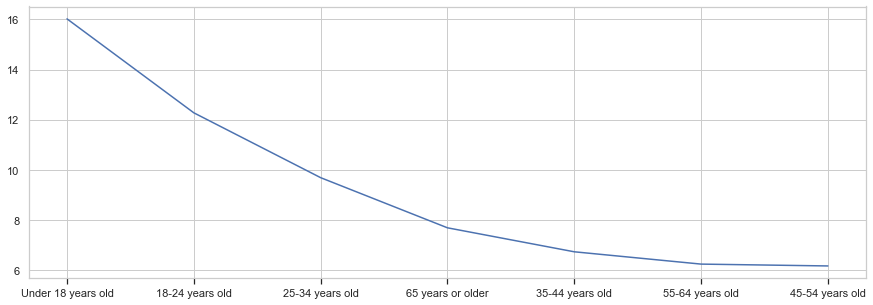

In [961]:
plt.plot(sex_df.index, sex_df.percenytnonbinary);